In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
customer = pd.read_csv('customer.csv')
customer_feedback = pd.read_csv('customer_feedback.csv')
expansion_outcome = pd.read_csv('expansion_outcome.csv')
product = pd.read_csv('product.csv')
utilization = pd.read_csv('utilization.csv')

In [10]:
data = customer.merge(customer_feedback, on=["id","score_date"], how="left").merge(expansion_outcome, on=["id","score_date"], how="left").merge(product, on=["id","score_date"], how="left").merge(utilization, on=["id","score_date"], how="left")

In [11]:
data.shape

(13417, 55)

In [12]:
data.groupby(by="id").value_counts()

id             score_date  segment_smb  segment_non_smb  segment_commercial  segment_enterprise  segment_midmarket  region_emea  region_apac  region_latam  region_amer  customer_age_quarters  sales_assisted  legacy_flag  product_counts  billing_dunning_not_ok  crm_industry_current  crm_employee_range  crm_success_owner_change  csat_score  csat_response_rate  nps_score  nps_score_all_time  avg_nps_rating  avg_nps_rating_all_time  outreach_call_90dayflag  num_low_sev_outages  num_high_sev_outages  has_high_sev_outage  months_since_high_sev_outage  num_tickets_deflected  max_tickets_per_agent  current_arr  future_arr  arr_change  fx_impact  seat_change_arr  product_change_arr  discount_arr_usd  team_plus  pro_plus  ent_plus  discount_arr_usd_percentage  product_counts_percentage  total_pool_max_agents  max_seats  agent_utilization  is_provisioned_any_channel_M_before  max_seats_M_before  agent_utilization_increase  agent_utilization_decrease  seat_utilization  seat_utilization_M_before  s

In [13]:
df = data.copy()  

df['score_date'] = pd.to_datetime(df['score_date'], format='%d-%m-%Y')

df = df.sort_values(by=['id', 'score_date'])

df['cross_sell_flag'] = df.groupby('id')[['team_plus', 'pro_plus', 'ent_plus']].diff().gt(0).any(axis=1).astype(int)

df['upsell_flag'] = df.groupby('id')[['max_seats']].diff().gt(0).any(axis=1).astype(int)


print(df)


                  id score_date  segment_smb  segment_non_smb  \
6610   JMAN_10025258 2023-01-06            0                1   
5730   JMAN_10025258 2023-01-13            0                1   
4357   JMAN_10025258 2023-01-20            0                1   
11965  JMAN_10025258 2023-01-27            0                1   
8693   JMAN_10025258 2023-02-03            0                1   
...              ...        ...          ...              ...   
3085    JMAN_9999715 2023-03-03            0                1   
11542   JMAN_9999715 2023-03-10            0                1   
5895    JMAN_9999715 2023-03-17            0                1   
3554    JMAN_9999715 2023-03-24            0                1   
7541    JMAN_9999715 2023-03-31            0                1   

       segment_commercial  segment_enterprise  segment_midmarket  region_emea  \
6610                    0                   0                  0            0   
5730                    0                   0            

In [ ]:
df['cross_sell_flag'].value_counts()

cross_sell_flag
0    13407
1       10
Name: count, dtype: int64

In [ ]:
df[df['cross_sell_flag']==1]

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,...,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease,change_flag
3774,JMAN_10410810,2023-03-10,0,1,1,0,0,0,0,0,...,0.000000,8.0,21.0,0,1,0.266667,0.380952,0,1,1
11608,JMAN_11352880,2023-03-31,0,1,1,0,0,0,0,0,...,0.636364,11.0,12.0,0,1,0.916667,0.916667,0,0,1
9825,JMAN_2374491,2023-02-10,1,0,0,0,0,0,0,0,...,0.500000,4.0,4.0,0,0,1.000000,1.000000,0,0,1
5275,JMAN_2453288,2023-01-27,1,0,0,0,0,1,0,0,...,1.000000,1.0,1.0,0,0,1.000000,1.000000,0,0,1
3895,JMAN_2455695,2023-02-24,1,0,0,0,0,0,1,0,...,0.000000,1.0,1.0,0,0,1.000000,1.000000,0,0,1
1647,JMAN_2456399,2023-02-24,1,0,0,0,0,1,0,0,...,0.600000,5.0,5.0,0,1,1.000000,1.000000,0,0,1
9275,JMAN_2475298,2023-03-03,0,1,0,0,0,1,0,0,...,0.318182,22.0,27.0,0,1,0.814815,0.814815,0,0,1
8455,JMAN_2478377,2023-02-17,0,1,1,0,0,1,0,0,...,0.000000,2.0,2.0,0,0,0.666667,1.000000,0,1,1
7886,JMAN_2478556,2023-03-31,0,1,0,0,0,0,0,0,...,0.466667,15.0,20.0,0,1,0.750000,0.750000,0,0,1
10521,JMAN_9124812,2023-03-31,0,1,0,0,0,1,0,0,...,0.000000,1.0,1.0,0,0,0.500000,1.000000,0,1,1


In [ ]:
df[df['id']=='JMAN_9043466'][['id','score_date','current_arr','team_plus','pro_plus','ent_plus','cross_sell_flag','product_change_arr','seat_change_arr','fx_impact']]

,id,score_date,current_arr,team_plus,pro_plus,ent_plus,change_flag,product_change_arr,seat_change_arr,fx_impact
2255,JMAN_9043466,2023-01-06,20724.72,1,1,1,0,499.56,0.0,250.56
1,JMAN_9043466,2023-01-13,20724.72,1,1,1,0,499.56,0.0,250.56
6120,JMAN_9043466,2023-01-20,20724.72,1,1,1,0,499.56,0.0,250.56
2214,JMAN_9043466,2023-01-27,20724.72,1,1,1,0,499.56,0.0,250.56
9688,JMAN_9043466,2023-02-03,20923.08,1,1,1,0,499.56,0.0,422.04
6032,JMAN_9043466,2023-02-10,20923.08,1,1,1,0,499.56,0.0,422.04
12235,JMAN_9043466,2023-02-17,20923.08,1,1,1,0,499.56,0.0,422.04
53,JMAN_9043466,2023-02-24,20923.08,1,1,1,0,499.56,0.0,422.04
1806,JMAN_9043466,2023-03-03,20523.48,1,1,1,0,499.56,0.0,821.64
11294,JMAN_9043466,2023-03-10,20523.48,1,1,1,0,499.56,0.0,508.08


In [17]:
df['upsell_flag'].value_counts()

upsell_flag
0    13330
1       87
Name: count, dtype: int64

In [18]:
df[df['upsell_flag']==1]

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,...,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease,cross_sell_flag,upsell_flag
8671,JMAN_10069485,2023-03-10,1,0,0,0,0,0,0,0,...,5.0,5.0,0,1,1.000000,1.000000,0,0,0,1
3774,JMAN_10410810,2023-03-10,0,1,1,0,0,0,0,0,...,8.0,21.0,0,1,0.266667,0.380952,0,1,1,1
8314,JMAN_10429945,2023-01-13,0,1,1,0,0,0,1,0,...,209.0,210.0,0,1,0.954545,0.995238,0,1,0,1
894,JMAN_10429945,2023-02-24,0,1,1,0,0,0,1,0,...,220.0,220.0,0,1,0.995652,1.000000,0,1,0,1
12066,JMAN_10429945,2023-03-10,0,1,1,0,0,0,1,0,...,220.0,220.0,0,1,1.000000,1.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,JMAN_9309647,2023-01-13,1,0,0,0,0,0,0,0,...,22.0,22.0,0,1,0.821429,1.000000,0,1,0,1
7347,JMAN_9309647,2023-02-17,1,0,0,0,0,0,0,0,...,28.0,28.0,0,1,0.965517,1.000000,0,1,0,1
11199,JMAN_9492699,2023-01-27,0,1,0,0,1,1,0,0,...,16.0,16.0,1,0,0.941176,1.000000,0,1,0,1
6123,JMAN_9492699,2023-02-17,0,1,0,0,1,1,0,0,...,16.0,16.0,0,1,1.000000,1.000000,0,0,0,1


In [ ]:
df[df['upsell_flag']==1].to_csv('upsell_flag.csv',index=False)

In [ ]:
df[df['id']=='JMAN_10429945'][['id','score_date','current_arr','team_plus','pro_plus','ent_plus','cross_sell_flag','product_change_arr','seat_change_arr','fx_impact']]

,id,score_date,current_arr,team_plus,pro_plus,ent_plus,change_flag,product_change_arr,seat_change_arr,fx_impact
9946,JMAN_10429945,2023-01-06,172500.0,1,1,0,0,0.0,89615.22500,0.0
8314,JMAN_10429945,2023-01-13,172500.0,1,1,0,0,0.0,89615.22500,0.0
6569,JMAN_10429945,2023-01-20,172500.0,1,1,0,0,0.0,89615.22500,0.0
10686,JMAN_10429945,2023-01-27,172500.0,1,1,0,0,0.0,89615.22500,0.0
1951,JMAN_10429945,2023-02-03,172500.0,1,1,0,0,0.0,89615.22500,0.0
8085,JMAN_10429945,2023-02-10,172500.0,1,1,0,0,0.0,89615.22500,0.0
5850,JMAN_10429945,2023-02-17,182250.0,1,1,0,0,0.0,81774.31591,0.0
894,JMAN_10429945,2023-02-24,182250.0,1,1,0,0,0.0,81774.31591,0.0
1645,JMAN_10429945,2023-03-03,192000.0,1,1,0,0,0.0,73850.40287,0.0
12066,JMAN_10429945,2023-03-10,192000.0,1,1,0,0,0.0,73850.40287,0.0


In [19]:
df['arr_cross_sell_flag'] = df.groupby('id')[['current_arr']].diff().gt(0).any(axis=1).astype(int)


In [20]:
df['arr_cross_sell_flag'].value_counts()

arr_cross_sell_flag
0    13092
1      325
Name: count, dtype: int64

In [21]:
df[df['arr_cross_sell_flag']==1][['id','score_date','current_arr','team_plus','pro_plus','ent_plus','cross_sell_flag','product_change_arr','seat_change_arr','fx_impact']]

,id,score_date,current_arr,team_plus,pro_plus,ent_plus,cross_sell_flag,product_change_arr,seat_change_arr,fx_impact
5639,JMAN_10059360,2023-02-03,7792.56,1,1,1,0,0.00,1921.71000,215.04
7188,JMAN_10069485,2023-03-03,3528.00,1,1,0,0,0.00,0.00000,0.00
10078,JMAN_10177857,2023-02-03,31572.84,1,1,1,0,0.00,0.00000,611.64
3774,JMAN_10410810,2023-03-10,45360.00,1,1,1,1,0.00,0.00000,0.00
5850,JMAN_10429945,2023-02-17,182250.00,1,1,0,0,0.00,81774.31591,0.00
...,...,...,...,...,...,...,...,...,...,...
1170,JMAN_9806549,2023-02-03,441.60,1,1,1,0,0.00,0.00000,68.04
11867,JMAN_9827638,2023-01-20,28656.00,1,1,1,0,0.00,-4776.00000,0.00
10159,JMAN_9897409,2023-02-03,10816.20,1,1,0,0,-6274.44,0.00000,334.20
12128,JMAN_9926068,2023-02-03,6130.20,1,0,0,0,0.00,0.00000,118.68


In [ ]:
# Filter DataFrames based on the conditions
df1 = df[df['arr_cross_sell_flag'] == 1]
df2 = df[df['cross_sell_flag'] == 1]

# Get rows that are in df1 but not in df2
df_only_in_df1 = df1.merge(df2, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

# Display the result
df_only_in_df1['id'].value_counts()


id
JMAN_9038279     4
JMAN_10473228    4
JMAN_2445669     4
JMAN_10670367    3
JMAN_9492699     3
                ..
JMAN_2454663     1
JMAN_2454977     1
JMAN_2456399     1
JMAN_2456787     1
JMAN_9948637     1
Name: count, Length: 281, dtype: int64

/tmp/ipykernel_6274/59118795.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  upsell_trend = df.groupby('utilization_bin')['change_flag'].mean().reset_index()
/tmp/ipykernel_6274/59118795.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=upsell_trend, x='utilization_bin', y='change_flag', palette="viridis")


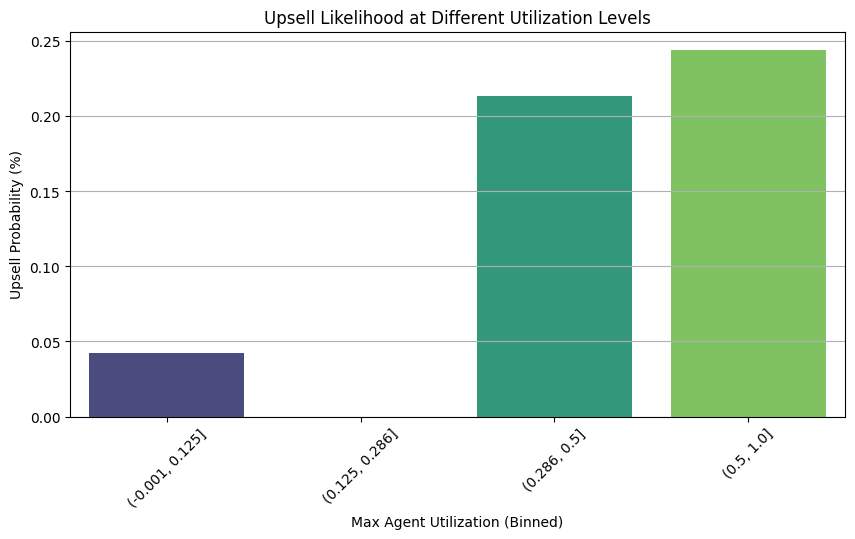

In [ ]:
# Aggregate: Calculate the mean upsell flag for each unique max_agent_utilization
upsell_trend = df.groupby('agent_utilization')['cross_sell_flag'].mean().reset_index()




# Create bins for better readability
df['utilization_bin'] = pd.qcut(df['agent_utilization'], q=10, duplicates='drop')  # Adjust q for fewer bins

# Aggregate upsell flag mean for each bin
upsell_trend = df.groupby('utilization_bin')['cross_sell_flag'].mean().reset_index()
upsell_trend['cross_sell_flag'] *= 100  # Convert to percentage

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=upsell_trend, x='utilization_bin', y='cross_sell_flag', palette="viridis")

plt.xlabel("Max Agent Utilization (Binned)")
plt.ylabel("Upsell Probability (%)")
plt.title("Upsell Likelihood at Different Utilization Levels")
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y')

plt.show()


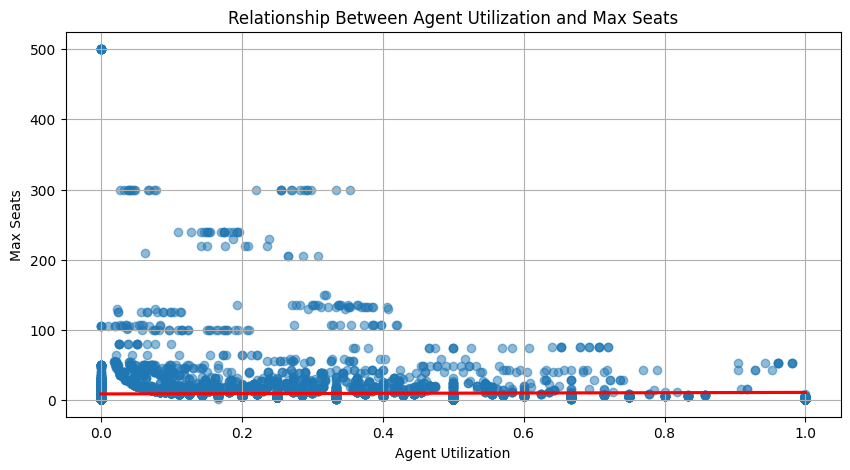

In [45]:
plt.figure(figsize=(10, 5))

# Scatter plot with regression line
sns.regplot(data=df, x='agent_utilization', y='max_seats', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Labels and title
plt.xlabel("Agent Utilization")
plt.ylabel("Max Seats")
plt.title("Relationship Between Agent Utilization and Max Seats")

plt.grid(True)
plt.show()


In [36]:
df[['agent_utilization', 'max_seats']].corr()


,agent_utilization,max_seats
agent_utilization,1.000000,0.022225
max_seats,0.022225,1.000000


In [43]:
utilization.columns

Index(['id', 'score_date', 'max_seats', 'agent_utilization',
       'is_provisioned_any_channel_M_before', 'max_seats_M_before',
       'agent_utilization_increase', 'agent_utilization_decrease',
       'seat_utilization', 'seat_utilization_M_before',
       'seat_utilization_increase', 'seat_utilization_decrease'],
      dtype='object')

In [44]:
utilization[[ 'max_seats', 'agent_utilization',
       'is_provisioned_any_channel_M_before', 'max_seats_M_before',
       'agent_utilization_increase', 'agent_utilization_decrease',
       'seat_utilization', 'seat_utilization_M_before',
       'seat_utilization_increase', 'seat_utilization_decrease']].corr()

,max_seats,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease
max_seats,1.000000,0.022225,0.988370,0.998487,0.018868,0.186956,0.032837,0.045365,0.171514,0.297175
agent_utilization,0.022225,1.000000,0.005355,0.022213,0.326634,-0.076643,0.189496,0.186319,0.026484,0.035230
is_provisioned_any_channel_M_before,0.988370,0.005355,1.000000,0.989068,0.013139,0.163200,-0.065927,-0.043757,0.165780,0.272058
max_seats_M_before,0.998487,0.022213,0.989068,1.000000,0.019360,0.186375,0.034007,0.044300,0.176332,0.289997
agent_utilization_increase,0.018868,0.326634,0.013139,0.019360,1.000000,-0.200693,0.064166,0.060740,0.033259,0.056941
agent_utilization_decrease,0.186956,-0.076643,0.163200,0.186375,-0.200693,1.000000,0.268880,0.274961,0.125583,0.160082
seat_utilization,0.032837,0.189496,-0.065927,0.034007,0.064166,0.268880,1.000000,0.965163,0.050855,-0.052847
seat_utilization_M_before,0.045365,0.186319,-0.043757,0.044300,0.060740,0.274961,0.965163,1.000000,-0.079398,0.051428
seat_utilization_increase,0.171514,0.026484,0.165780,0.176332,0.033259,0.125583,0.050855,-0.079398,1.000000,-0.048786
seat_utilization_decrease,0.297175,0.035230,0.272058,0.289997,0.056941,0.160082,-0.052847,0.051428,-0.048786,1.000000


In [ ]:
df[['cross_sell_flag', 'csat_score']].corr()

,change_flag,csat_score
change_flag,1.00000,0.02371
csat_score,0.02371,1.00000


In [ ]:
df[['cross_sell_flag', 'max_seats']].corr()

,change_flag,max_seats
change_flag,1.000000,0.001687
max_seats,0.001687,1.000000


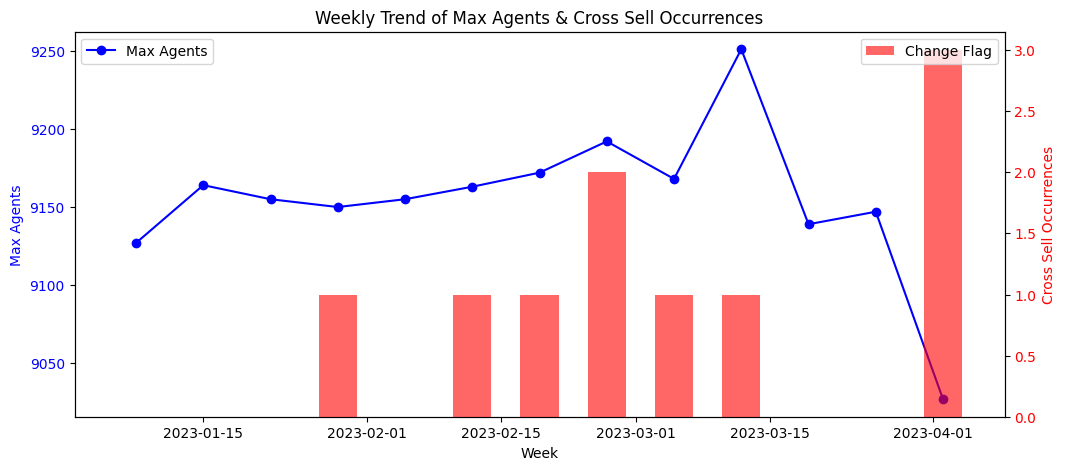

In [22]:

# Aggregate data weekly
weekly_data = df.resample('W', on='score_date').agg({'max_seats': 'sum', 'cross_sell_flag': 'sum'})

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Line plot for max_seats
ax1.plot(weekly_data.index, weekly_data['max_seats'], 'bo-', label='Max Agents')
ax1.set_xlabel('Week')
ax1.set_ylabel('Max Agents', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Bar plot for cross_sell_flag
ax2 = ax1.twinx()
ax2.bar(weekly_data.index, weekly_data['cross_sell_flag'], color='red', alpha=0.6, width=4, label='Change Flag')
ax2.set_ylabel('Cross Sell Occurrences', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title & Legend
plt.title('Weekly Trend of Max Agents & Cross Sell Occurrences')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()




In [23]:

weekly_data

,max_seats,cross_sell_flag
score_date,,
2023-01-08,9127.0,0
2023-01-15,9164.0,0
2023-01-22,9155.0,0
2023-01-29,9150.0,1
2023-02-05,9155.0,0
2023-02-12,9163.0,1
2023-02-19,9172.0,1
2023-02-26,9192.0,2
2023-03-05,9168.0,1


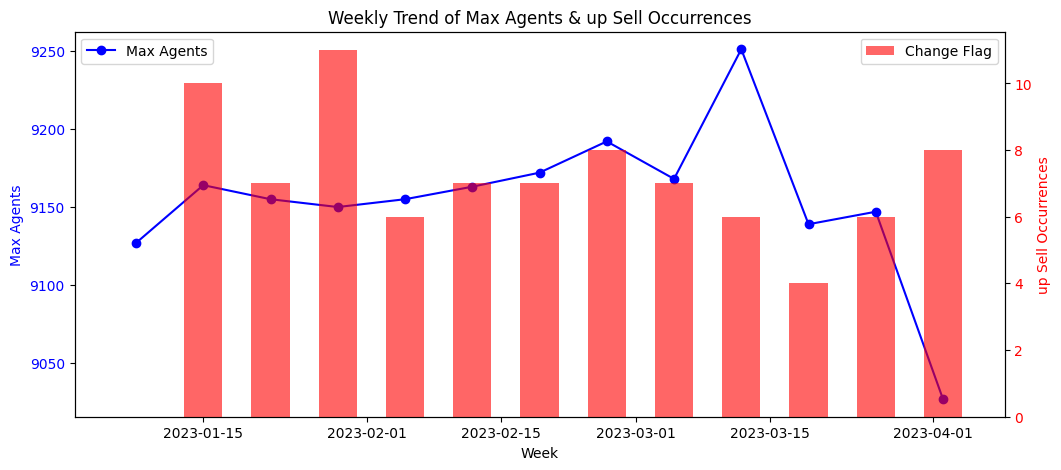

In [26]:

# Aggregate data weekly
weekly_data = df.resample('W', on='score_date').agg({'max_seats': 'sum', 'upsell_flag': 'sum'})

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Line plot for max_seats
ax1.plot(weekly_data.index, weekly_data['max_seats'], 'bo-', label='Max Agents')
ax1.set_xlabel('Week')
ax1.set_ylabel('Max Agents', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Bar plot for cross_sell_flag
ax2 = ax1.twinx()
ax2.bar(weekly_data.index, weekly_data['upsell_flag'], color='red', alpha=0.6, width=4, label='Change Flag')
ax2.set_ylabel('up Sell Occurrences', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title & Legend
plt.title('Weekly Trend of Max Agents & up Sell Occurrences')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()




In [27]:
weekly_data

,max_seats,upsell_flag
score_date,,
2023-01-08,9127.0,0
2023-01-15,9164.0,10
2023-01-22,9155.0,7
2023-01-29,9150.0,11
2023-02-05,9155.0,6
2023-02-12,9163.0,7
2023-02-19,9172.0,7
2023-02-26,9192.0,8
2023-03-05,9168.0,7


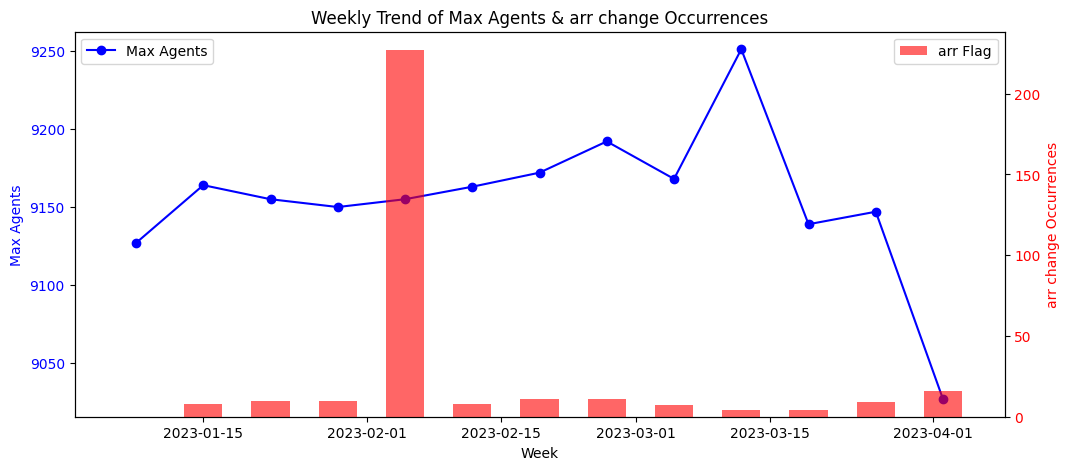

In [32]:

# Aggregate data weekly
weekly_data = df.resample('W', on='score_date').agg({'max_seats': 'sum', 'arr_cross_sell_flag': 'sum'})

# Plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Line plot for max_seats
ax1.plot(weekly_data.index, weekly_data['max_seats'], 'bo-', label='Max Agents')
ax1.set_xlabel('Week')
ax1.set_ylabel('Max Agents', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Bar plot for cross_sell_flag
ax2 = ax1.twinx()
ax2.bar(weekly_data.index, weekly_data['arr_cross_sell_flag'], color='red', alpha=0.6, width=4, label='arr Flag')
ax2.set_ylabel('arr change Occurrences', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title & Legend
plt.title('Weekly Trend of Max Agents & arr change Occurrences')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()




In [31]:
weekly_data

,max_seats,arr_cross_sell_flag
score_date,,
2023-01-08,9127.0,0
2023-01-15,9164.0,8
2023-01-22,9155.0,10
2023-01-29,9150.0,10
2023-02-05,9155.0,227
2023-02-12,9163.0,8
2023-02-19,9172.0,11
2023-02-26,9192.0,11
2023-03-05,9168.0,7
